<a href="https://colab.research.google.com/github/Somshirsha/Image-Classification/blob/main/image_classification_CNN_CIFAR10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

the output shows there are 50000 training samples,each sample is 32X32 image and 3 represents the rgb channels


In [53]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [54]:
x_test.shape

(10000, 32, 32, 3)

The training sample comes in the form of 32X32 for each sample in 3 rgb channels each

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
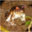

In [55]:
x_train[0]  #we are checking each of the training samples

In [56]:
y_train[:5]  #the numbers in the 2D array gives index of the class of image in the dataset

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [57]:
#reshaping to 1d array
y_train=y_train.reshape(-1,)  #'-1'= we want to keep the first dimension to 10000 and leave the next dimension'' because we want to flatten it and without [6] array we want simple 6
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [59]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [58]:
classes[9]

'truck'

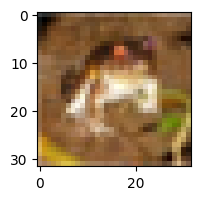

In [60]:
plt.figure(figsize=(10,2))
plt.imshow(x_train[0])  #gives image of the frog


In [61]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

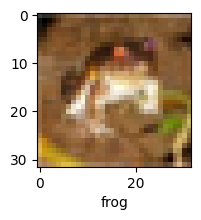

In [62]:
plot_sample(x_train,y_train,0)

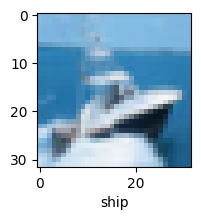

In [63]:
plot_sample(x_train,y_train,8)

Normalizing Data

In [64]:
x_train=x_train/255
x_test=x_test/255
x_train
x_test


array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

Create a simple artificial neural network to train the model

In [65]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [66]:
tf.test.is_built_with_cuda()

True

Model building & training

In [67]:
ann= models.Sequential(
    [layers.Flatten(input_shape=(32,32,3)),
     layers.Dense(3000,activation='relu'),
     layers.Dense(1000,activation='relu'),
     layers.Dense(10,activation='sigmoid')
     ]
)
ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 151s 96ms/step - loss: 1.8148 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.6241 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.5437 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 158s 101ms/step - loss: 1.4853 - accuracy: 0.4764
Epoch 5/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.4335 - accuracy: 0.4942


In [68]:
ann.evaluate(x_test,y_test) #test set gave 47% accuracy

313/313 [==============================] - 10s 32ms/step - loss: 1.5015 - accuracy: 0.4531


[1.501485824584961, 0.4530999958515167]

In [69]:
#classification report
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classiofication Report:\n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 10s 33ms/step
Classiofication Report:
               precision    recall  f1-score   support

           0       0.72      0.29      0.42      1000
           1       0.72      0.37      0.49      1000
           2       0.27      0.63      0.38      1000
           3       0.39      0.28      0.33      1000
           4       0.52      0.25      0.33      1000
           5       0.43      0.32      0.37      1000
           6       0.55      0.48      0.51      1000
           7       0.64      0.48      0.55      1000
           8       0.43      0.80      0.56      1000
           9       0.46      0.63      0.53      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.45     10000
weighted avg       0.51      0.45      0.45     10000



In [70]:
#using cnn
cnn= models.Sequential(
    [
     #cnn layer
     #first layer of convolution and pooling
     layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
     layers.MaxPooling2D((2,2)),

     #second layer of convolution and pooling
     layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
     layers.MaxPooling2D((2,2)),


     #dense
     layers.Flatten(),
     layers.Dense(64,activation='relu'),
     layers.Dense(10,activation='softmax'),

     ])

In [71]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
cnn.fit(x_train,y_train,epochs=10) #cnn provides more accuracy after 5 epochs compared to ann

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4773 - accuracy: 0.4696
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1459 - accuracy: 0.5994
Epoch 3/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0170 - accuracy: 0.6447
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9423 - accuracy: 0.6744
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8854 - accuracy: 0.6922
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8275 - accuracy: 0.7132
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7898 - accuracy: 0.7240
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7505 - accuracy: 0.7384
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7131 - accuracy: 0.7495
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [73]:
cnn.evaluate(x_test,y_test)  #test set gave 68% accuracy with cnn

313/313 [==============================] - 3s 10ms/step - loss: 0.9764 - accuracy: 0.6778


[0.9763652086257935, 0.6777999997138977]

In [74]:
#reshaping
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

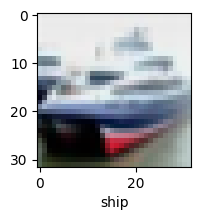

In [75]:
plot_sample(x_test,y_test,1) #1st image is obtained

In [76]:
#we use our model to predict this image
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 14ms/step


array([[4.39524977e-03, 6.20275314e-05, 3.77586787e-03, 9.11459804e-01,
        6.76422380e-04, 4.98498194e-02, 1.94322020e-02, 3.26791051e-05,
        1.02496063e-02, 6.62468374e-05],
       [4.56336141e-03, 3.70534044e-03, 1.64029802e-06, 1.81424230e-06,
        5.14600060e-08, 8.03864086e-10, 8.39134451e-09, 5.18524388e-08,
        9.91646886e-01, 8.08879340e-05],
       [3.44264135e-02, 9.45245028e-02, 9.81741468e-04, 3.19500198e-03,
        9.42908591e-05, 2.36395554e-05, 1.11195013e-05, 2.59730514e-05,
        8.64143431e-01, 2.57377326e-03],
       [8.81872714e-01, 1.55667495e-02, 1.09568229e-02, 1.33241247e-03,
        4.62453766e-03, 6.95614017e-06, 4.46323102e-05, 2.63980735e-04,
        8.40606093e-02, 1.27042958e-03],
       [2.06143704e-05, 8.39385539e-05, 5.24881259e-02, 5.58730476e-02,
        2.43700057e-01, 6.89840689e-02, 5.78221560e-01, 4.33319910e-05,
        5.56501211e-04, 2.86994818e-05]], dtype=float32)

In [77]:
#to find out the max element we use arg_max() function
np.argmax([5,12,6,2]) #12 is the max element and its index is 1


1

In [78]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [79]:
y_test[:5] #the first value is 3 instead of 5. This slight error is due to just 68% accuracy

array([3, 8, 8, 0, 6], dtype=uint8)

In [80]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

actual value and predicted value

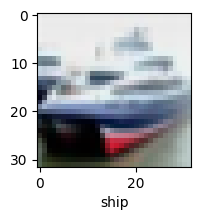

In [81]:
#actual value
plot_sample(x_test,y_test,1)

In [82]:
#predicted value
classes[y_classes[1]]

'ship'

In [83]:
#classification report using cnn gives better values on 5 epochs
print("Classification Report:\n",classification_report(y_test,y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.79      0.70      1000
           1       0.72      0.86      0.79      1000
           2       0.52      0.61      0.56      1000
           3       0.58      0.39      0.47      1000
           4       0.64      0.61      0.62      1000
           5       0.65      0.54      0.59      1000
           6       0.80      0.70      0.75      1000
           7       0.75      0.71      0.73      1000
           8       0.71      0.82      0.76      1000
           9       0.79      0.75      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000

